# Library import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Installing kneed for elbow method analysis

!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Library imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from kneed import KneeLocator
import scipy.cluster.hierarchy as sch
from pandas.core.common import random_state

# KMeans with Seconds_Since_Last_Order, Sum_of_Prices and frequency

In [4]:
def KMeans_Clustering(n_clusters, scores_pca):

  # defining the kmeans function with initialization as k-means++
  kmeans = KMeans(n_clusters, init='k-means++', random_state = 42)

  # fitting the k means algorithm on the data
  kmeans_pca = kmeans.fit(scores_pca)

  return kmeans_pca

In [5]:
def Data_Standardising(X):

  # standardising the data
  scaler = StandardScaler()
  data_scaled = scaler.fit_transform(X)

  return data_scaled

In [6]:
def Elbow_Method(X):
  # fitting multiple k-means algorithms and storing the values in an empty list
  SSE = []
  for cluster in range(1,10):
      kmeans = KMeans(n_clusters = cluster, init='k-means++')
      kmeans.fit(X)
      SSE.append(kmeans.inertia_)

  # converting the results into a dataframe and plotting them
  frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
  plt.figure(figsize=(12,6))
  plt.plot(frame['Cluster'], frame['SSE'], marker='o')
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')

  kl = KneeLocator(range(1, 10), SSE, curve="convex", direction="decreasing")
  print("The elbow is at cluster")
  print(kl.elbow)

In [7]:
def Silhouette_Method(X):
 
  for i in [3, 4, 5, 6, 7, 8]:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit_predict(X)
    score = silhouette_score(X, km.labels_, metric='euclidean')
    print('Silhouette Score for', i, 'Clusters: %.3f' % score)

In [8]:
def PCA_Variance_Graph(X_scaled, End_Range):
    
  pca = PCA()
  pca.fit(X_scaled)
  pca.explained_variance_ratio_

  plt.figure(figsize= (12,6))
  plt.plot(range(1,End_Range), pca.explained_variance_ratio_.cumsum(), marker='o')
  plt.title('Variance by Components')
  plt.xlabel('Number of Components')
  plt.ylabel('Cumulative Explained Varience')

In [9]:
def PCA_Function(X_scaled, n_components):

  pca = PCA(n_components)

  pca.fit(X_scaled)

  pca.transform(X_scaled)

  scores_pca = pca.transform(X_scaled)

  return scores_pca

In [10]:
Order_Dataset = pd.read_csv("/content/drive/MyDrive/Order_Dataset.csv")

In [11]:
# Creation of simple dataframe for KMeans

Testing = Order_Dataset[['Seconds_Since_Last_Order', 'Sum_of_Prices', 'frequency']]

In [12]:
# Data standardising

Testing_scaled = Data_Standardising(Testing)

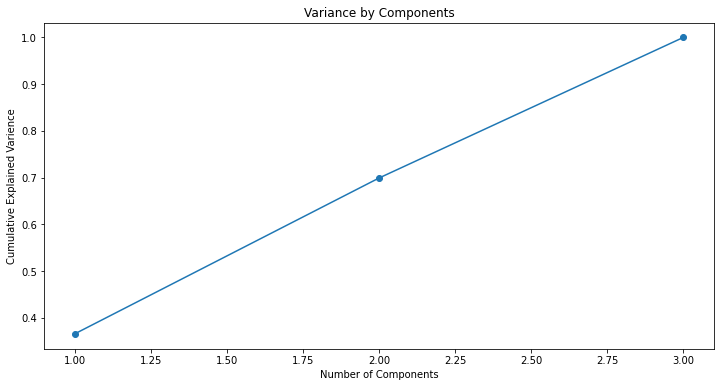

In [13]:
# Shows graph with total number of PCA components

Plot_End_Range = 4

PCA_Variance_Graph(Testing_scaled, Plot_End_Range)

In [14]:
# Runs PCA on the dataframe, in this case two components will give 66% of the data and three components will give 100% of the data

n_components = 3

scores_pca = PCA_Function(Testing_scaled, n_components)

The elbow is at cluster
4


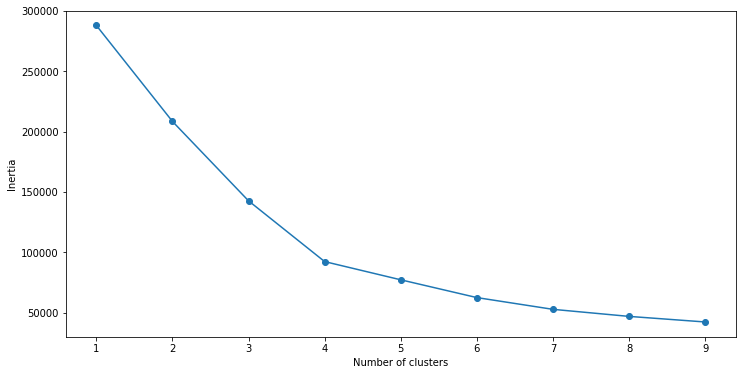

In [15]:
Elbow_Method(scores_pca)

In [16]:
# Maximum score for four clusters 

Silhouette_Method(scores_pca)

Silhouette Score for 3 Clusters: 0.458
Silhouette Score for 4 Clusters: 0.493
Silhouette Score for 5 Clusters: 0.424
Silhouette Score for 6 Clusters: 0.440
Silhouette Score for 7 Clusters: 0.441
Silhouette Score for 8 Clusters: 0.447


In [17]:
# Runs KMeans clustering with four clusters

n_clusters = 4

kmeans_pca = KMeans_Clustering(n_clusters, scores_pca)

In [18]:
# Adds three new component columns and a new cluster column to a new df_kmeans dataframe

df_kmeans = pd.concat([Testing.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_kmeans.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']
df_kmeans['Cluster'] = kmeans_pca.labels_

In [19]:
df_kmeans.head()

,Seconds_Since_Last_Order,Sum_of_Prices,frequency,Component 1,Component 2,Component 3,Cluster
0,15167013.0,129.90,1,0.036151,-0.797733,-0.273511,3
1,15425313.0,18.90,1,-0.352199,-0.928137,0.113652,3
2,51936897.0,69.00,1,-0.662187,1.801694,0.491578,1
3,33276619.0,25.99,1,-0.564116,0.383136,0.358525,1
4,30428058.0,180.00,1,0.007702,0.382481,-0.216229,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


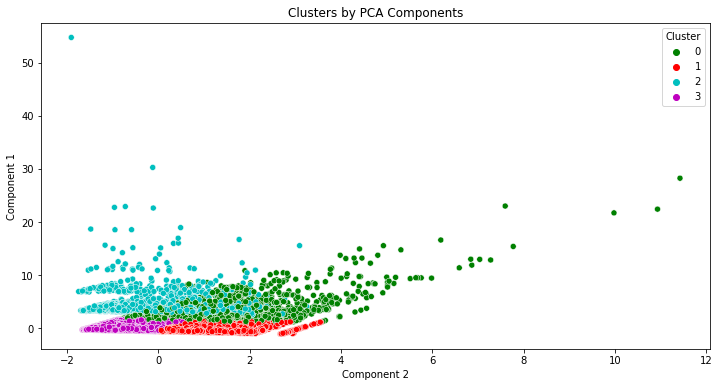

In [20]:
x_axis = df_kmeans['Component 2']
y_axis = df_kmeans['Component 1']
  
plt.figure(figsize=(12,6))
sns.scatterplot(x_axis, y_axis, hue = df_kmeans['Cluster'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

KMeans runs well on the dataset so it will be tested with review score and average customer spend data

In [21]:
df = df_kmeans

In [22]:
# Dividing up the data into individual clusters

Cluster_0 = df.loc[df["Cluster"] == 0]
Cluster_1 = df.loc[df["Cluster"] == 1]
Cluster_2 = df.loc[df["Cluster"] == 2]
Cluster_3 = df.loc[df["Cluster"] == 3]

In [23]:
#High spending customers
Cluster_0.describe()

,Seconds_Since_Last_Order,Sum_of_Prices,frequency,Component 1,Component 2,Component 3,Cluster
count,2.566000e+03,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.0
mean,2.646377e+07,1009.198952,1.008963,2.967094,1.207500,-3.107944,0.0
std,1.309815e+07,570.815779,0.094268,2.066820,1.236489,1.946602,0.0
min,5.627443e+06,548.000000,1.000000,1.232069,-0.812229,-23.158665,0.0
25%,1.558667e+07,659.000000,1.000000,1.712112,0.314181,-3.607707,0.0
50%,2.526048e+07,809.100000,1.000000,2.290193,1.004964,-2.486007,0.0
75%,3.557118e+07,1173.610000,1.000000,3.454698,1.926093,-1.912909,0.0
max,6.550767e+07,7388.000000,2.000000,28.242201,11.420214,-0.079778,0.0


In [24]:
#Less interesting customers
Cluster_1.describe()

,Seconds_Since_Last_Order,Sum_of_Prices,frequency,Component 1,Component 2,Component 3,Cluster
count,3.851500e+04,38515.000000,38515.0,38515.000000,38515.000000,38515.000000,38515.0
mean,3.911867e+07,102.748712,1.0,-0.375329,0.912348,0.181638,1.0
std,8.333878e+06,90.825010,0.0,0.332166,0.621685,0.336094,0.0
min,2.788757e+07,1.200000,1.0,-1.053972,-0.034610,-1.497352,1.0
25%,3.146934e+07,39.995000,1.0,-0.583141,0.370199,0.049532,1.0
50%,3.803775e+07,75.000000,1.0,-0.452870,0.829499,0.253749,1.0
75%,4.553606e+07,129.990000,1.0,-0.250541,1.373515,0.391821,1.0
max,6.809308e+07,649.170000,1.0,1.289569,3.565885,0.906494,1.0


In [25]:
#Returning customers
Cluster_2.describe()

,Seconds_Since_Last_Order,Sum_of_Prices,frequency,Component 1,Component 2,Component 3,Cluster
count,2.660000e+03,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.0
mean,2.425523e+07,214.162203,2.113910,4.104935,-0.115964,3.449858,2.0
std,1.237929e+07,178.960581,0.516186,2.071576,0.921461,1.747047,0.0
min,5.151183e+06,11.980000,2.000000,2.595527,-1.905345,-0.501706,2.0
25%,1.443485e+07,99.980000,2.000000,3.316516,-0.856704,2.899363,2.0
50%,2.241972e+07,163.900000,2.000000,3.578857,-0.235810,3.260732,2.0
75%,3.267237e+07,270.077500,2.000000,4.025931,0.493233,3.543463,2.0
max,6.528789e+07,1690.920000,16.000000,54.710120,3.247816,49.732804,2.0


In [26]:
#Customers that have ordered recently
Cluster_3.describe()

,Seconds_Since_Last_Order,Sum_of_Prices,frequency,Component 1,Component 2,Component 3,Cluster
count,5.222200e+04,52222.000000,52222.0,52222.000000,52222.000000,52222.000000,52222.0
mean,1.664941e+07,102.626519,1.0,-0.078068,-0.726304,-0.156973,3.0
std,6.267127e+06,89.383415,0.0,0.321626,0.471480,0.323615,0.0
min,5.561963e+06,0.850000,1.0,-0.561437,-1.662303,-1.982447,3.0
25%,1.117541e+07,40.000000,1.0,-0.291005,-1.127522,-0.279247,3.0
50%,1.678923e+07,78.000000,1.0,-0.155929,-0.714254,-0.083237,3.0
75%,2.196153e+07,132.910000,1.0,0.040823,-0.337903,0.056975,3.0
max,2.788130e+07,585.000000,1.0,1.735126,0.627209,0.345222,3.0


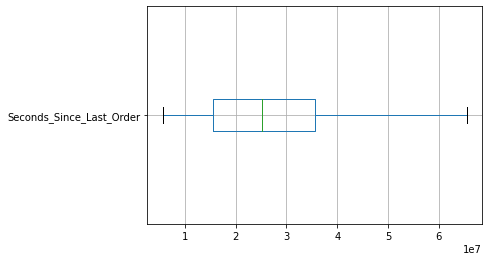

In [27]:
Cluster_0.boxplot(column = "Seconds_Since_Last_Order", vert=False)
plt.show()

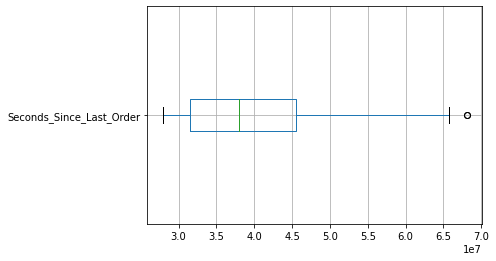

In [28]:
Cluster_1.boxplot(column = "Seconds_Since_Last_Order", vert=False)
plt.show()

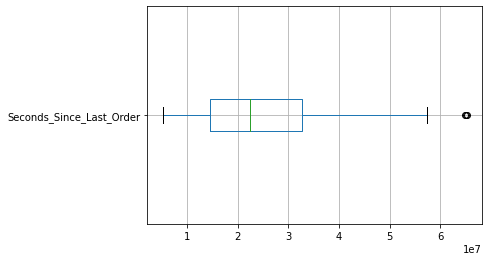

In [29]:
Cluster_2.boxplot(column = "Seconds_Since_Last_Order", vert=False)
plt.show()

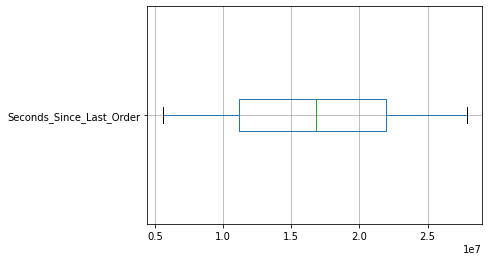

In [30]:
Cluster_3.boxplot(column = "Seconds_Since_Last_Order", vert=False)
plt.show()

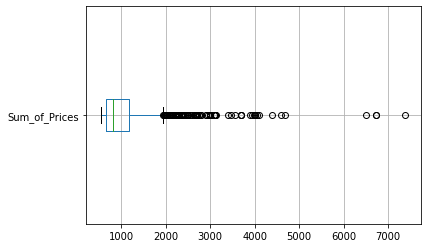

In [31]:
Cluster_0.boxplot(column = "Sum_of_Prices", vert=False)
plt.show()

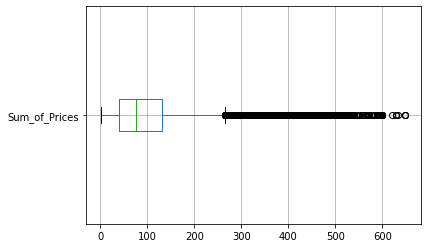

In [32]:
Cluster_1.boxplot(column = "Sum_of_Prices", vert=False)
plt.show()

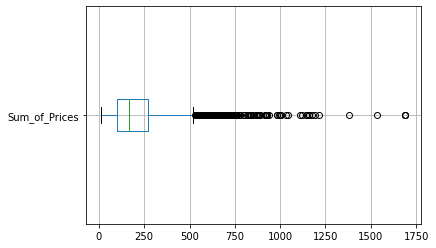

In [33]:
Cluster_2.boxplot(column = "Sum_of_Prices", vert=False)
plt.show()

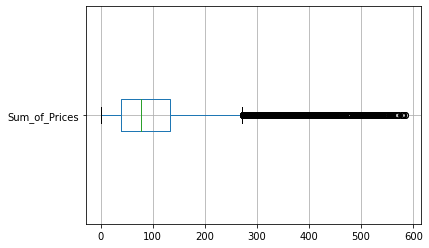

In [34]:
Cluster_3.boxplot(column = "Sum_of_Prices", vert=False)
plt.show()

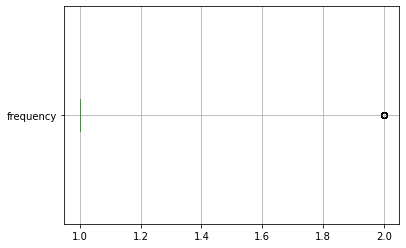

In [35]:
Cluster_0.boxplot(column = "frequency", vert=False)
plt.show()

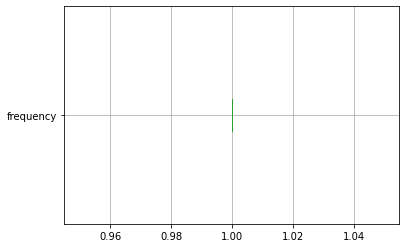

In [36]:
Cluster_1.boxplot(column = "frequency", vert=False)
plt.show()

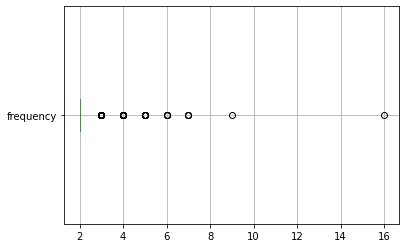

In [37]:
Cluster_2.boxplot(column = "frequency", vert=False)
plt.show()

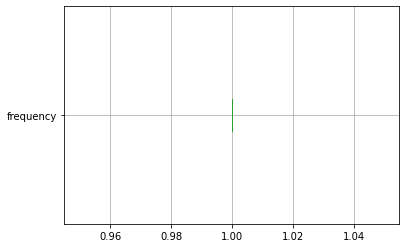

In [38]:
Cluster_3.boxplot(column = "frequency", vert=False)
plt.show()

In [39]:
df_kmeans.to_csv('/content/drive/MyDrive/df_kmeans.csv')

# KMeans with Review Score

In [40]:
# Creating a new simple dataframe with review score, Seconds_Since_Last_Order', 'Sum_of_Prices' and 'frequency'

Testing2 = Order_Dataset[['review_score', 'Seconds_Since_Last_Order', 'Sum_of_Prices', 'frequency']]

In [41]:
Testing2_scaled = Data_Standardising(Testing2)

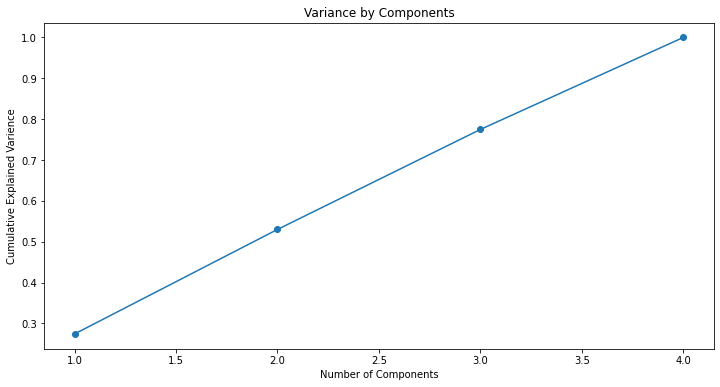

In [42]:
# Shows graph with total number of PCA components

Plot_End_Range = 5

PCA_Variance_Graph(Testing2_scaled, Plot_End_Range)

In [43]:
# Runs PCA on the dataframe, in this case three components will give 75% of the data and four components will give 100% of the data

n_components = 4

scores_pca2 = PCA_Function(Testing2_scaled, n_components)

The elbow is at cluster
5


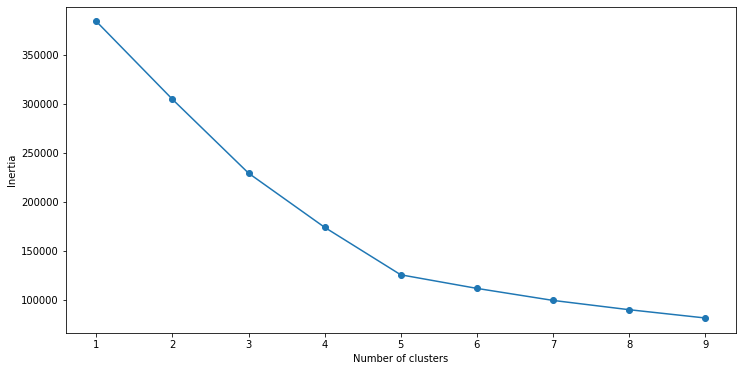

In [44]:
Elbow_Method(scores_pca2)

In [45]:
# The Silhouette Method suggests five or six clusters

Silhouette_Method(scores_pca2)

Silhouette Score for 3 Clusters: 0.405
Silhouette Score for 4 Clusters: 0.394
Silhouette Score for 5 Clusters: 0.417
Silhouette Score for 6 Clusters: 0.425
Silhouette Score for 7 Clusters: 0.352
Silhouette Score for 8 Clusters: 0.353


In [46]:
# Runs KMeans clustering with five clusters

n_clusters = 5

kmeans_pca2 = KMeans_Clustering(n_clusters, scores_pca2)

In [47]:
# Adds four new component columns and a new cluster column to a new df_kmeans2 dataframe

df_kmeans2 = pd.concat([Testing2.reset_index(drop = True), pd.DataFrame(scores_pca2)], axis = 1)
df_kmeans2.columns.values[-4:] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
df_kmeans2['Cluster'] = kmeans_pca2.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


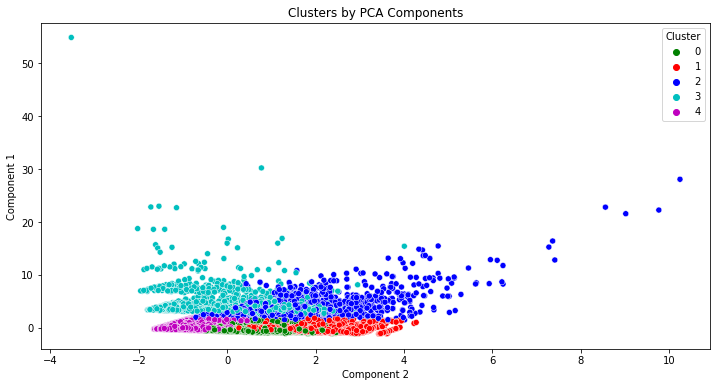

In [48]:
x_axis = df_kmeans2['Component 2']
y_axis = df_kmeans2['Component 1']
  
plt.figure(figsize=(12,6))
sns.scatterplot(x_axis, y_axis, hue = df_kmeans2['Cluster'], palette = ['g', 'r', 'b', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

In [49]:
df = df_kmeans2

In [50]:
# Dividing the data into separate clusters

Cluster_0 = df.loc[df["Cluster"] == 0]
Cluster_1 = df.loc[df["Cluster"] == 1]
Cluster_2 = df.loc[df["Cluster"] == 2]
Cluster_3 = df.loc[df["Cluster"] == 3]
Cluster_4 = df.loc[df["Cluster"] == 4]

In [51]:
#Customers giving good reviews, but never returning to the website
Cluster_0.describe()

,review_score,Seconds_Since_Last_Order,Sum_of_Prices,frequency,Component 1,Component 2,Component 3,Component 4,Cluster
count,31954.000000,3.195400e+04,31954.000000,31954.0,31954.000000,31954.000000,31954.000000,31954.000000,31954.0
mean,4.624711,3.955315e+07,105.536796,1.0,-0.362909,0.356811,0.979639,0.091580,0.0
std,0.604377,8.229981e+06,98.322415,0.0,0.358099,0.564089,0.514432,0.362722,0.0
min,2.000000,2.768330e+07,2.290000,1.0,-1.108038,-0.544183,-0.104659,-1.814264,0.0
25%,4.000000,3.226677e+07,40.000000,1.0,-0.581499,-0.076806,0.616255,-0.036843,0.0
50%,5.000000,3.871298e+07,75.000000,1.0,-0.444426,0.276867,0.938201,0.170157,0.0
75%,5.000000,4.576310e+07,131.900000,1.0,-0.239736,0.704862,1.339415,0.313278,0.0
max,5.000000,6.560299e+07,689.990000,1.0,1.524336,3.274063,2.823448,0.990457,0.0


In [52]:
#Customers giving poor reviews, hence never returning to the website
Cluster_1.describe()

,review_score,Seconds_Since_Last_Order,Sum_of_Prices,frequency,Component 1,Component 2,Component 3,Component 4,Cluster
count,17174.000000,1.717400e+04,17174.000000,17174.0,17174.000000,17174.000000,17174.000000,17174.000000,17174.0
mean,1.661523,2.616543e+07,110.515507,1.0,-0.255841,1.271627,-1.282947,0.211422,1.0
std,0.847734,1.121621e+07,107.317220,0.0,0.400304,0.746524,0.736255,0.402908,0.0
min,1.000000,5.571241e+06,1.200000,1.0,-1.152185,-0.055229,-2.774642,-1.988700,1.0
25%,1.000000,1.904511e+07,41.900000,1.0,-0.491475,0.683619,-1.892032,0.068478,1.0
50%,1.000000,2.448023e+07,79.000000,1.0,-0.334329,1.223128,-1.314302,0.283585,1.0
75%,2.000000,3.120371e+07,139.890000,1.0,-0.118151,1.739201,-0.688242,0.449952,1.0
max,3.000000,6.809308e+07,719.880000,1.0,2.009459,4.278384,0.725167,1.104919,1.0


In [53]:
#High spending customers
Cluster_2.describe()

,review_score,Seconds_Since_Last_Order,Sum_of_Prices,frequency,Component 1,Component 2,Component 3,Component 4,Cluster
count,1974.000000,1.974000e+03,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.0
mean,4.119048,2.623279e+07,1129.434539,1.011651,3.369814,1.334845,0.477869,-3.517083,2.0
std,1.353231,1.340797e+07,600.439443,0.107338,2.159751,1.310442,1.048406,2.036518,0.0
min,1.000000,5.627443e+06,599.000000,1.000000,1.360601,-0.710699,-2.323313,-22.985322,2.0
25%,4.000000,1.507441e+07,759.000000,1.000000,2.076058,0.370850,-0.128745,-4.057938,2.0
50%,5.000000,2.455988e+07,899.990000,1.000000,2.642593,1.155069,0.429968,-2.835455,2.0
75%,5.000000,3.630301e+07,1299.650000,1.000000,3.872274,2.001634,1.189376,-2.287235,2.0
max,5.000000,6.550767e+07,7388.000000,2.000000,28.064300,10.249722,5.402195,0.182822,2.0


In [54]:
#Returning customers
Cluster_3.describe()

,review_score,Seconds_Since_Last_Order,Sum_of_Prices,frequency,Component 1,Component 2,Component 3,Component 4,Cluster
count,2660.000000,2.660000e+03,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.0
mean,4.178947,2.425523e+07,214.162203,2.113910,4.114884,-0.233362,0.275790,3.421512,3.0
std,1.292618,1.237929e+07,178.960581,0.516186,2.075878,0.966734,0.940072,1.734419,0.0
min,1.000000,5.151183e+06,11.980000,2.000000,2.501555,-3.529534,-2.405295,-0.571442,3.0
25%,4.000000,1.443485e+07,99.980000,2.000000,3.330680,-0.985019,-0.247197,2.866303,3.0
50%,5.000000,2.241972e+07,163.900000,2.000000,3.589306,-0.397484,0.267307,3.235344,3.0
75%,5.000000,3.267237e+07,270.077500,2.000000,4.038092,0.374378,0.929145,3.517507,3.0
max,5.000000,6.528789e+07,1690.920000,16.000000,54.850008,4.010041,3.747464,49.351982,3.0


In [55]:
#Customers giving good reviews, with a recent order but never returning to the website
Cluster_4.describe()

,review_score,Seconds_Since_Last_Order,Sum_of_Prices,frequency,Component 1,Component 2,Component 3,Component 4,Cluster
count,42201.000000,4.220100e+04,42201.000000,42201.0,42201.000000,42201.000000,42201.000000,42201.000000,42201.0
mean,4.675553,1.608960e+07,104.417274,1.0,-0.038089,-0.835399,-0.259401,-0.206531,4.0
std,0.555790,6.284451e+06,94.752648,0.0,0.338366,0.425931,0.468132,0.341278,0.0
min,3.000000,5.561963e+06,0.850000,1.0,-0.545740,-1.659587,-1.736531,-2.245873,4.0
25%,4.000000,1.057675e+07,39.990000,1.0,-0.254861,-1.167312,-0.539667,-0.323441,4.0
50%,5.000000,1.582079e+07,78.000000,1.0,-0.118889,-0.849353,-0.236045,-0.126505,4.0
75%,5.000000,2.145950e+07,134.170000,1.0,0.077986,-0.542892,0.084874,0.013105,4.0
max,5.000000,2.791126e+07,650.000000,1.0,1.985528,0.709232,0.759721,0.334988,4.0


# KMeans with Review Score and Average Price

In [56]:
# Creating a new simple dataframe with review score, Seconds_Since_Last_Order', 'Average_Price' and 'frequency'

Testing3 = Order_Dataset[['review_score', 'Seconds_Since_Last_Order', 'Average_Price', 'frequency']]

In [57]:
Testing3_scaled = Data_Standardising(Testing3)

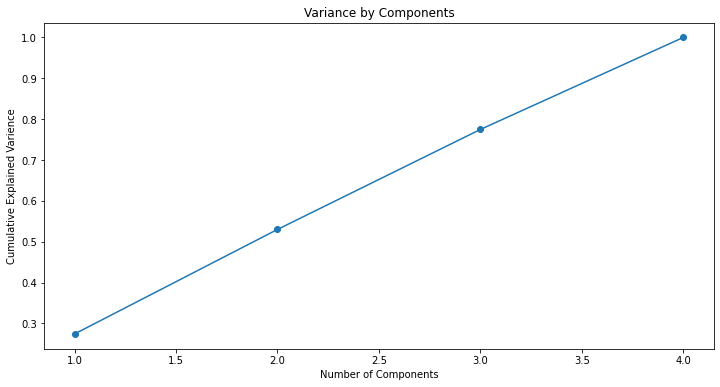

In [58]:
# Shows graph with total number of PCA components

Plot_End_Range = 5

PCA_Variance_Graph(Testing2_scaled, Plot_End_Range)

In [59]:
# Runs PCA on the dataframe, in this case three components will give 75% of the data and four components will give 100% of the data

n_components = 4

scores_pca3 = PCA_Function(Testing3_scaled, n_components)

The elbow is at cluster
5


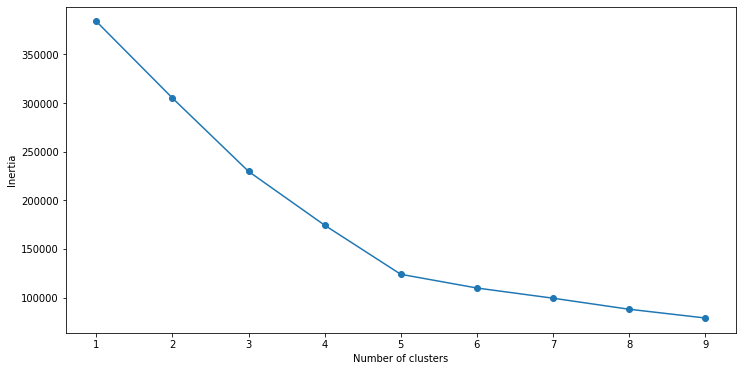

In [60]:
Elbow_Method(scores_pca3)

In [61]:
# The Silhouette Method suggests either five or six clusters

Silhouette_Method(scores_pca3)

Silhouette Score for 3 Clusters: 0.404
Silhouette Score for 4 Clusters: 0.393
Silhouette Score for 5 Clusters: 0.418
Silhouette Score for 6 Clusters: 0.424
Silhouette Score for 7 Clusters: 0.351
Silhouette Score for 8 Clusters: 0.352


In [62]:
# Runs KMeans clustering with five clusters

n_clusters = 5

kmeans_pca3 = KMeans_Clustering(n_clusters, scores_pca3)

In [63]:
# Adds four new component columns and a new cluster column to a new df_kmeans3 dataframe

df_kmeans3 = pd.concat([Testing3.reset_index(drop = True), pd.DataFrame(scores_pca3)], axis = 1)
df_kmeans3.columns.values[-4:] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
df_kmeans3['Cluster'] = kmeans_pca2.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


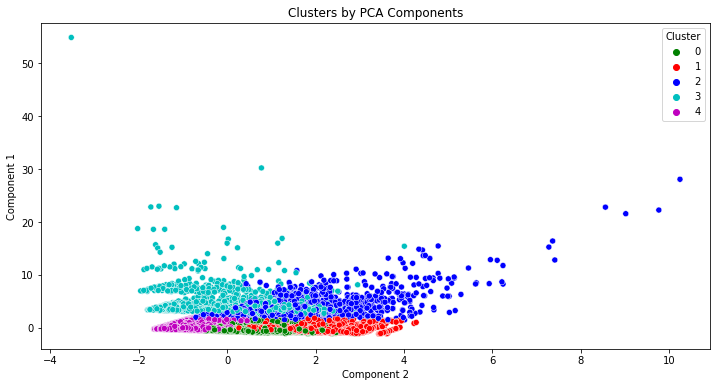

In [64]:
x_axis = df_kmeans2['Component 2']
y_axis = df_kmeans2['Component 1']
  
plt.figure(figsize=(12,6))
sns.scatterplot(x_axis, y_axis, hue = df_kmeans3['Cluster'], palette = ['g', 'r', 'b', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

In [65]:
df = df_kmeans3

In [66]:
# Dividing the data into separate clusters

Cluster_0 = df.loc[df["Cluster"] == 0]
Cluster_1 = df.loc[df["Cluster"] == 1]
Cluster_2 = df.loc[df["Cluster"] == 2]
Cluster_3 = df.loc[df["Cluster"] == 3]
Cluster_4 = df.loc[df["Cluster"] == 4]

In [67]:
#Customers giving good reviews, but never returning to the website
Cluster_0.describe()

,review_score,Seconds_Since_Last_Order,Average_Price,frequency,Component 1,Component 2,Component 3,Component 4,Cluster
count,31954.000000,3.195400e+04,31954.000000,31954.0,31954.000000,31954.000000,31954.000000,31954.000000,31954.0
mean,4.624711,3.955315e+07,105.536796,1.0,-0.410577,-0.664582,-0.379360,0.685252,0.0
std,0.604377,8.229981e+06,98.322415,0.0,0.474155,0.530073,0.375524,0.456924,0.0
min,2.000000,2.768330e+07,2.290000,1.0,-3.228311,-2.098269,-1.195488,-0.229156,0.0
25%,4.000000,3.226677e+07,40.000000,1.0,-0.717658,-1.008647,-0.599064,0.320110,0.0
50%,5.000000,3.871298e+07,75.000000,1.0,-0.349097,-0.705301,-0.541778,0.637871,0.0
75%,5.000000,4.576310e+07,131.900000,1.0,-0.052975,-0.415188,-0.034887,0.999835,0.0
max,5.000000,6.560299e+07,689.990000,1.0,0.401020,1.994025,1.282508,3.005366,0.0


In [68]:
#Customers giving poor reviews, hence never returning to the website
Cluster_1.describe()

,review_score,Seconds_Since_Last_Order,Average_Price,frequency,Component 1,Component 2,Component 3,Component 4,Cluster
count,17174.000000,1.717400e+04,17174.000000,17174.0,17174.000000,17174.000000,17174.000000,17174.000000,17174.0
mean,1.661523,2.616543e+07,110.515507,1.0,-0.956789,0.083828,1.377357,-0.742165,1.0
std,0.847734,1.121621e+07,107.317220,0.0,0.618093,0.637196,0.512329,0.621970,0.0
min,1.000000,5.571241e+06,1.200000,1.0,-3.888573,-1.773654,0.068233,-2.104486,1.0
25%,1.000000,1.904511e+07,41.900000,1.0,-1.322134,-0.303113,0.805320,-1.199551,1.0
50%,1.000000,2.448023e+07,79.000000,1.0,-0.871825,0.034272,1.686036,-0.763891,1.0
75%,2.000000,3.120371e+07,139.890000,1.0,-0.479369,0.419239,1.815355,-0.327970,1.0
max,3.000000,6.809308e+07,719.880000,1.0,0.192059,3.433614,1.888973,1.960221,1.0


In [69]:
#High spending customers
Cluster_2.describe()

,review_score,Seconds_Since_Last_Order,Average_Price,frequency,Component 1,Component 2,Component 3,Component 4,Cluster
count,1974.000000,1.974000e+03,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.0
mean,4.119048,2.623279e+07,1117.432490,1.011651,-1.978252,4.339664,-1.082780,1.640395,2.0
std,1.353231,1.340797e+07,578.329666,0.107338,1.434522,2.590988,1.009535,1.270898,0.0
min,1.000000,5.627443e+06,599.000000,1.000000,-13.801754,1.134225,-7.373375,-0.693138,2.0
25%,4.000000,1.507441e+07,750.000000,1.000000,-2.613550,2.764480,-1.569971,0.749511,2.0
50%,5.000000,2.455988e+07,899.300000,1.000000,-1.763852,3.615790,-1.252234,1.419073,2.0
75%,5.000000,3.630301e+07,1299.000000,1.000000,-1.021805,5.011959,-0.636929,2.287708,2.0
max,5.000000,6.550767e+07,6735.000000,2.000000,2.467566,29.776452,4.122538,12.790354,2.0


In [70]:
#Returning customers
Cluster_3.describe()

,review_score,Seconds_Since_Last_Order,Average_Price,frequency,Component 1,Component 2,Component 3,Component 4,Cluster
count,2660.000000,2.660000e+03,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.0
mean,4.178947,2.425523e+07,101.219529,2.113910,3.126938,0.786826,3.056117,2.977910,3.0
std,1.292618,1.237929e+07,80.105155,0.516186,1.635971,0.736481,1.633469,1.611757,0.0
min,1.000000,5.151183e+06,5.990000,2.000000,0.343319,-1.200507,1.741317,0.843251,3.0
25%,4.000000,1.443485e+07,49.322500,2.000000,2.362251,0.349328,2.257736,2.171913,3.0
50%,5.000000,2.241972e+07,79.625000,2.000000,2.994955,0.771319,2.314220,2.662539,3.0
75%,5.000000,3.267237e+07,129.000000,2.000000,3.521939,1.145694,3.443485,3.342710,3.0
max,5.000000,6.528789e+07,587.450000,16.000000,42.339333,11.849434,42.134201,41.871726,3.0


In [71]:
#Customers giving good reviews, with a recent order but never returning to the website
Cluster_4.describe()

,review_score,Seconds_Since_Last_Order,Average_Price,frequency,Component 1,Component 2,Component 3,Component 4,Cluster
count,42201.000000,4.220100e+04,42201.000000,42201.0,42201.000000,42201.000000,42201.000000,42201.000000,42201.0
mean,4.675553,1.608960e+07,104.417274,1.0,0.595694,0.216510,-0.415263,-0.481268,4.0
std,0.555790,6.284451e+06,94.752648,0.0,0.366464,0.484721,0.346138,0.393064,0.0
min,3.000000,5.561963e+06,0.850000,1.0,-1.061286,-0.682606,-1.168924,-1.581002,4.0
25%,4.000000,1.057675e+07,39.990000,1.0,0.351130,-0.108077,-0.613950,-0.775829,4.0
50%,5.000000,1.582079e+07,78.000000,1.0,0.605377,0.159035,-0.550992,-0.480276,4.0
75%,5.000000,2.145950e+07,134.170000,1.0,0.869289,0.425699,-0.097072,-0.189429,4.0
max,5.000000,2.791126e+07,650.000000,1.0,1.347336,2.963300,0.684946,1.020652,4.0


# DBScan and agglomerative clustering

In [72]:
def Find_eps(df):

  X = df.iloc[:, -4:-1]
  X = np.array(X)
  neigh = NearestNeighbors(n_neighbors=2)
  nbrs = neigh.fit(X)
  distances, indices = nbrs.kneighbors(X)
  distances = np.sort(distances, axis=0)
  distances = distances[:,1]
  plt.plot(distances)

In [73]:
def DBSCAN_Function(df, eps, min_samples):

  X = df.iloc[:, -4:-1]
  X = np.array(X)

  dbscan_cluster = DBSCAN(eps=eps, min_samples=min_samples)
  dbscan_cluster.fit(X)

  # Visualizing DBSCAN
  plt.scatter(X[:, 0], X[:, 1], c=dbscan_cluster.labels_)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")

  # Number of Clusters
  labels=dbscan_cluster.labels_
  N_clus=len(set(labels))-(1 if -1 in labels else 0)
  print('Estimated no. of clusters: %d' % N_clus)

  # Identify Noise
  n_noise = list(dbscan_cluster.labels_).count(-1)
  print('Estimated no. of noise points: %d' % n_noise)

In [74]:
def Show_dendrogram(df):

  X = df.iloc[:, -4:-1]
  X = np.array(X)
  dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [75]:
def Agglomerative_Clustering(df, n_clusters):

  X = df.iloc[:, -4:-1]
  X = np.array(X)

  model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
  model.fit(X)
  labels = model.labels_

  plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
  plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
  plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
  plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
  plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
  plt.show()

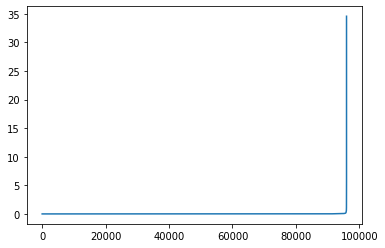

In [76]:
# Use of Nearest Neighbors to gain some insight into eps figure for DBSCAN (ie any number above 1)

Find_eps(df_kmeans)

Estimated no. of clusters: 3
Estimated no. of noise points: 10396


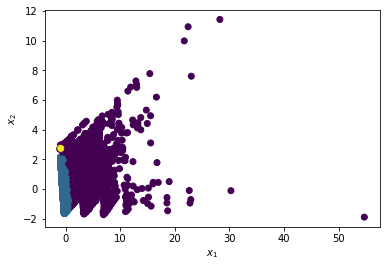

In [77]:
# DBSCAN function using the standardised dataset scores_pca with components from 'Seconds_Since_Last_Order', 'Sum_of_Prices', 'frequency'. 
# If I try to set eps to a higher number than 0.1 google colab crashes (Not enough RAM)

eps = 0.1
min_samples = 100

DBSCAN_Function(df_kmeans, eps, min_samples)

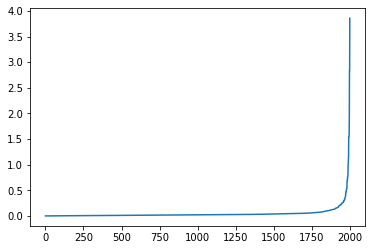

In [78]:
# Use of Nearest Neighbors to gain some insight into eps figure for DBSCAN (ie any number above 1)

df_kmeans_sample = df_kmeans.sample(n=2000)

Find_eps(df_kmeans_sample)

Estimated no. of clusters: 1
Estimated no. of noise points: 6


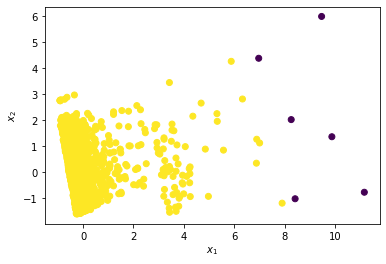

In [79]:
# DBSCAN function using 2000 entries from standardised dataset scores_pca with components from 'Seconds_Since_Last_Order', 'Sum_of_Prices', 'frequency'.

eps = 5
min_samples = 100

DBSCAN_Function(df_kmeans_sample, eps, min_samples)

DBSCAN is not sutiable for this application as it is based on density. The dataset is not dense, also it seems much more demanding in terms of RAM than KMeans

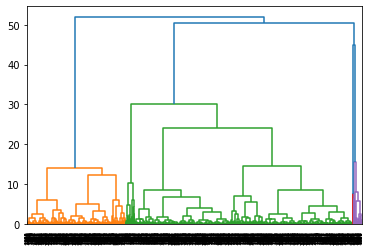

In [80]:
# Agglomerative Clustering function using 2000 entries from standardised dataset scores_pca with components from 'Seconds_Since_Last_Order', 'Sum_of_Prices', 'frequency'. 
# If I try to use the whole dataset google colab crashes (Not enough RAM)

df_kmeans_sample = df_kmeans.sample(n=2000)

Show_dendrogram(df_kmeans_sample)

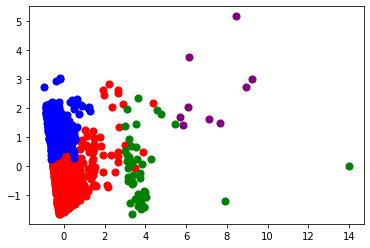

In [81]:
n_clusters = 4

Agglomerative_Clustering(df_kmeans_sample, n_clusters)

Agglomerative clustering works okay on a smaple of the dataset but like DBSCAN it is very demanding in terms of RAM requirements